# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

### Task 1: Load the Data

In [2]:
# your code here
!ls

 online_retail.ipynb  'Online Retail.xlsx'


In [3]:
# Loading dataset in to a Pandas DataFrame
retail_init = pd.read_excel('Online Retail.xlsx')

# Displaying the first few rows of DataFrame
retail_init.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Task 2: Data Cleaning

In [4]:
retail_init.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [5]:
retail_init.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Removing row with NaN entries
retail_cleaned = retail_init.dropna()
retail_cleaned.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

In [7]:
# Removing column with NaN entries
data_clean = retail_init.dropna(axis = 1)
data_clean.count()

InvoiceNo      541909
StockCode      541909
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
Country        541909
dtype: int64

In [8]:
data_clean.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

In [9]:
retail_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Task 3 : Dataset statistics

In [10]:
retail_init[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


#### Central tendency (Mean , Median and Mode) - Quantity , UnitPrice

In [11]:
quantity_mean = retail_init['Quantity'].mean()
quantity_median = retail_init['Quantity'].median()
quantity_mode = retail_init['Quantity'].mode().iloc[0]

unitprice_mean = retail_init['UnitPrice'].mean()
unitprice_median = retail_init['UnitPrice'].median()
unitprice_mode = retail_init['UnitPrice'].mode().iloc[0]

print('Quantity')
print('Median : ', quantity_mean)
print('Median : ', quantity_median)
print('Median : ', quantity_mode)
print()
print('Unit Price')
print('Median : ', unitprice_mean)
print('Median : ', unitprice_median)
print('Median : ', unitprice_mode)

Quantity
Median :  9.55224954743324
Median :  3.0
Median :  1

Unit Price
Median :  4.611113626083471
Median :  2.08
Median :  1.25


#### Dispersion - Quantity , UnitPrice

In [12]:
# Range
quantity_range = retail_init['Quantity'].max() - retail_init['Quantity'].min()
unitprice_range = retail_init['UnitPrice'].max() - retail_init['UnitPrice'].min()

# Vairance
quantity_var = retail_init['Quantity'].var()
unitprice_var = retail_init['UnitPrice'].var()

# Standard Deviation
quantity_std = retail_init['Quantity'].std()
unitprice_std = retail_init['UnitPrice'].std()

# Inter-quartile Range
quantity_iqr = retail_init['Quantity'].quantile(0.75) - retail_init['Quantity'].quantile(0.25)
unitprice_iqr = retail_init['UnitPrice'].quantile(0.75) - retail_init['UnitPrice'].quantile(0.25)

In [13]:
print('Quantity')
print('Range : ', quantity_range)
print('Variance : ', quantity_var)
print('Standard Deviation : ', quantity_std)
print('Inter-quartile Range : ', quantity_iqr)
print()
print('Unit Price')
print('Range : ', unitprice_range)
print('Variance : ', unitprice_var)
print('Standard Deviation  : ', unitprice_std)
print('Inter-quartile Range : ', unitprice_iqr)

Quantity
Range :  161990
Variance :  47559.39140913822
Standard Deviation :  218.08115784986612
Inter-quartile Range :  9.0

Unit Price
Range :  50032.06
Variance :  9362.469164424467
Standard Deviation  :  96.75985306119716
Inter-quartile Range :  2.88


### Task 4 : Data Visualization

##### Histograms

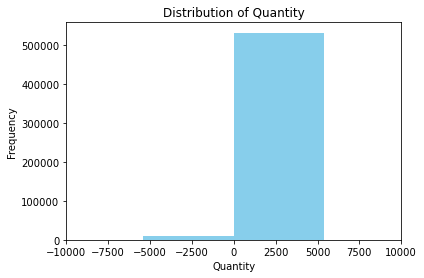

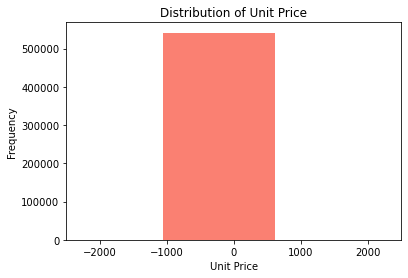

In [14]:
'''
Quantity: To visualize the distribution of the quantity of items ordered.
UnitPrice: To visualize the distribution of unit prices.'''

# Histogram for Quantity
plt.hist(retail_init['Quantity'], bins=30, color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')

plt.xlim(-10000, 10000)
plt.show()

# Histogram for UnitPrice
plt.hist(retail_init['UnitPrice'], bins=30, color='salmon')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Price')
plt.xlim(-2500, 2500)
plt.show()

##### Bar Plot

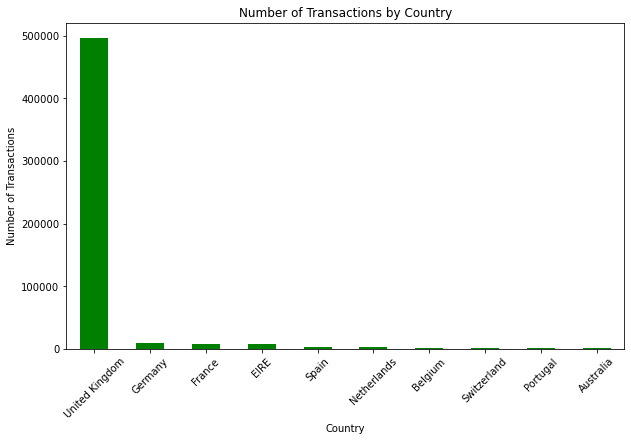

In [15]:
'''
Country: To visualize the number of transactions from different countries.'''
country_counts = retail_init['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='green')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Country')
plt.xticks(rotation=45)
plt.show()

##### Scatter plot

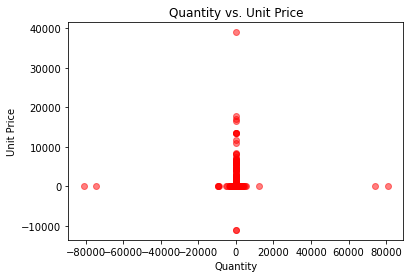

In [16]:
'''
Quantity vs. UnitPrice: To visualize the relationship between the quantity of items ordered and their unit prices.'''

plt.scatter(retail_init['Quantity'], retail_init['UnitPrice'], color='red', alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Quantity vs. Unit Price')
plt.show()

### Task 5 : Find Busiest Month and Day of the Week

In [18]:
# Adding new columns for Month and Day of Week.
retail_init['Month'] = retail_init['InvoiceDate'].dt.month
retail_init['DayOfWeek'] = retail_init['InvoiceDate'].dt.dayofweek


# Calculating Monthy Sales and identifying busiest month.
monthly_sales = retail_init.groupby('Month')['Quantity'].sum()
busiest_month = monthly_sales.idxmax()


# Calculation Weekly sales and identifying busiest week.
daily_sales = retail_init.groupby('DayOfWeek')['Quantity'].sum()
busiest_day_of_week = daily_sales.idxmax()

In [19]:
# Print the busiest month and day of the week
print("Busiest Month:", busiest_month)
print("Busiest Day of the Week:", busiest_day_of_week)

Busiest Month: 11
Busiest Day of the Week: 3


### Task 6 :  Find the top selling product

In [36]:
top_selling_products = retail_init.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

print('5 Top-Selling Products:')
print(top_selling_products.head(5))

5 Top-Selling Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    53847
JUMBO BAG RED RETROSPOT              47363
ASSORTED COLOUR BIRD ORNAMENT        36381
POPCORN HOLDER                       36334
PACK OF 72 RETROSPOT CAKE CASES      36039
Name: Quantity, dtype: int64


In [46]:
print('Top-Selling Product: {}'.format(top_selling_products.idxmax()))

Top-Selling Product: WORLD WAR 2 GLIDERS ASSTD DESIGNS


In [47]:
top_selling_countries = retail_init.groupby("Country")["Quantity"].sum().sort_values(ascending=False)

print('5 Top-Selling Countries:')
print(top_selling_countries.head(5))

5 Top-Selling Countries:
Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Name: Quantity, dtype: int64


In [48]:
print('Top-Selling Country: {}'.format(top_selling_countries.idxmax()))

Top-Selling Country: United Kingdom


### Task 7 : Identify any outliers or anomalies in the dataset

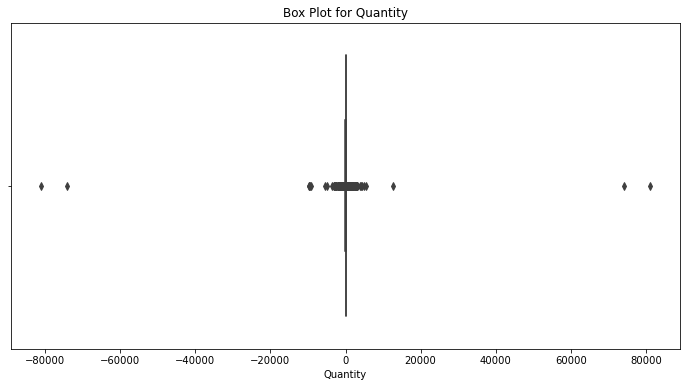

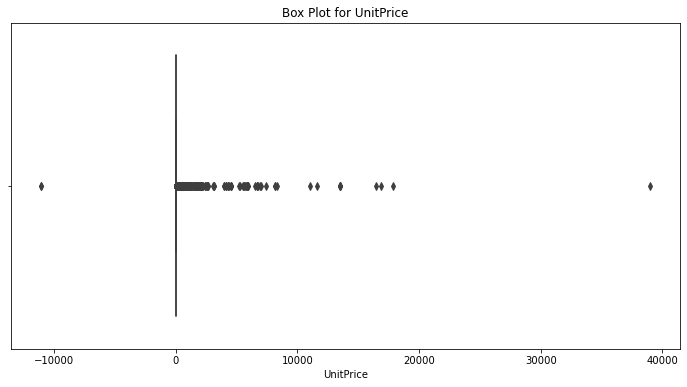

In [49]:
# Create box plots for Quantity and UnitPrice
plt.figure(figsize=(12, 6))
sns.boxplot(retail_init['Quantity'])
plt.title('Box Plot for Quantity')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(retail_init['UnitPrice'])
plt.title('Box Plot for UnitPrice')
plt.show()

In [64]:
# Data that lie below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.
Q1_quantity = retail_init['Quantity'].quantile(0.25)
Q3_quantity = retail_init['Quantity'].quantile(0.75)


lower_bound = Q1_quantity - 1.5 * quantity_iqr
upper_bound = Q3_quantity + 1.5 * quantity_iqr

outliers_quantity = retail_init[(retail_init['Quantity'] < lower_bound) | (retail_init['Quantity'] > upper_bound)]
print('Number of outliers based on Quantity : {}'.format(outliers_quantity.size))

Number of outliers based on Quantity : 586190


In [72]:
# Data that lie below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.
Q1_unitprice = retail_init['UnitPrice'].quantile(0.25)
Q3_unitprice = retail_init['UnitPrice'].quantile(0.75)


lower_bound = Q1_unitprice - 1.5 * quantity_iqr
upper_bound = Q3_unitprice + 1.5 * quantity_iqr

outliers_unitprice = retail_init[(retail_init['UnitPrice'] < lower_bound) | (retail_init['UnitPrice'] > upper_bound)]
print('Number of outliers based on Unit Price : {}'.format(outliers_unitprice.size))

Number of outliers based on Unit Price : 55200


### Task 8 : Draw conclusions and summarize your findings

###### Conclusion

In [69]:
print("1. Using Python for Exploratory data analysis makes easy to find the  mean , median and modes using the pandas library.")
print("2. It becomes very easy to visualize the data in different types of graphs such as in Histograms , Scatter plots and in Bar plots.")
print("3.Standard Deviation and variations can also be performed as pandas library has enriched with built in functions for data analysis.")

1. Using Python for Exploratory data analysis makes easy to find the  mean , median and modes using the pandas library.
2. It becomes very easy to visualize the data in different types of graphs such as in Histograms , Scatter plots and in Bar plots.
3.Standard Deviation and variations can also be performed as pandas library has enriched with built in functions for data analysis.


###### Summary

In [91]:
print('Total number of entries in Data Set : {}'.format(retail_init.size))
print('Total number of entries in Data Set after removing quantity anomaly : {}'.format(retail_init.size - outliers_quantity.size))
print('Total number of entries in Data Set after removing unit price anomaly : {}'.format(retail_init.size - outliers_unitprice.size))
print()
print('Busiest month by sales : {}'.format(calendar.month_name[busiest_month]))
print('Busiest day of week by sales : {}'.format('Wednesday'))
print()
print('Top-Selling Product: {}'.format(top_selling_products.idxmax()))
print('Top-Selling Country: {}'.format(top_selling_countries.idxmax()))

Total number of entries in Data Set : 5419090
Total number of entries in Data Set after removing quantity anomaly : 4832900
Total number of entries in Data Set after removing unit price anomaly : 5363890

Busiest month by sales : November
Busiest day of week by sales : Wednesday

Top-Selling Product: WORLD WAR 2 GLIDERS ASSTD DESIGNS
Top-Selling Country: United Kingdom


In [94]:
#exploring the unique values of each attribute
print("Number of transactions: ", retail_init['InvoiceNo'].nunique())
print("Number of products: ",retail_init['StockCode'].nunique())
print("Number of customers:", retail_init['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_init['CustomerID'].isnull().sum() * 100 / len(retail_init),2),"%" )
print('Number of countries: ',retail_init['Country'].nunique())

Number of transactions:  25900
Number of products:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38
